In [1]:
import missingno as msno
import pandas as pd

In [2]:
# Membaca file JSON ke dalam DataFrame
data = pd.read_csv('data.csv')
# Melihat data
print(data.head())

                                                _key  \
0                  In Rainbows but its just my voice   
1  three lices and a molly - 'maybe we'll hug eac...   
2  haircuts for men - テ​ン​ペ​ス​ト​地​域 (COLLECTED ED...   
3         The Greatest Legal Casino Heist in History   
4  🎶 1 Hour of Deep House Music 🎧, House Music, E...   

                                               title  \
0                  In Rainbows but its just my voice   
1  three lices and a molly - 'maybe we'll hug eac...   
2  haircuts for men - テ​ン​ペ​ス​ト​地​域 (COLLECTED ED...   
3         The Greatest Legal Casino Heist in History   
4  🎶 1 Hour of Deep House Music 🎧, House Music, E...   

                                      href  \
0  https://youtube.com/watch?v=Fno_k0VZtKs   
1  https://youtube.com/watch?v=ix-6vG3qXPc   
2  https://youtube.com/watch?v=F-a0NFpHvZU   
3  https://youtube.com/watch?v=uEkl2yAdoHw   
4  https://youtube.com/watch?v=mCOr5psAmxM   

                                                d

In [3]:
data.columns

Index(['_key', 'title', 'href', 'desc', 'likes', 'duration', 'channelName',
       'subCount', 'dateAndViews'],
      dtype='object')

In [4]:
data.describe().T

,count,unique,top,freq
_key,1409,1409,In Rainbows but its just my voice,1
title,1409,1409,In Rainbows but its just my voice,1
href,1409,1409,https://youtube.com/watch?v=Fno_k0VZtKs,1
desc,1409,1396,Find Nuero On vedal987,6
likes,1409,409,12345678901234567890123456789,41
duration,1369,1089,1:00:00,8
channelName,1409,780,ThePrimeTime,38
subCount,1408,714,563K subscribers,38
dateAndViews,1409,1403,3 views 3 Sept 2024,4


Dari hasil diatas kita mengetahui bahwa semua data memiliki type object

Mengecek nilai unique

In [5]:
#mengecek data uniqe
data.nunique()

_key            1409
title           1409
href            1409
desc            1396
likes            409
duration        1089
channelName      780
subCount         714
dateAndViews    1403
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _key          1409 non-null   object
 1   title         1409 non-null   object
 2   href          1409 non-null   object
 3   desc          1409 non-null   object
 4   likes         1409 non-null   object
 5   duration      1369 non-null   object
 6   channelName   1409 non-null   object
 7   subCount      1408 non-null   object
 8   dateAndViews  1409 non-null   object
dtypes: object(9)
memory usage: 99.2+ KB


1. Semua data memiliki type object
2. ada missing value pada duration dan subcount

Mengecek missing value

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("data memiliki " + str(df.shape[1]) + " kolom.\n"      
            "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              " kolom yang memiliki nilai null.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
data_missing = missing_values_table(data)
data_missing

data memiliki 9 kolom.
Terdapat 2 kolom yang memiliki nilai null.


,Missing Values,% of Total Values
duration,40,2.8
subCount,1,0.1


Ada missing value

<Axes: >

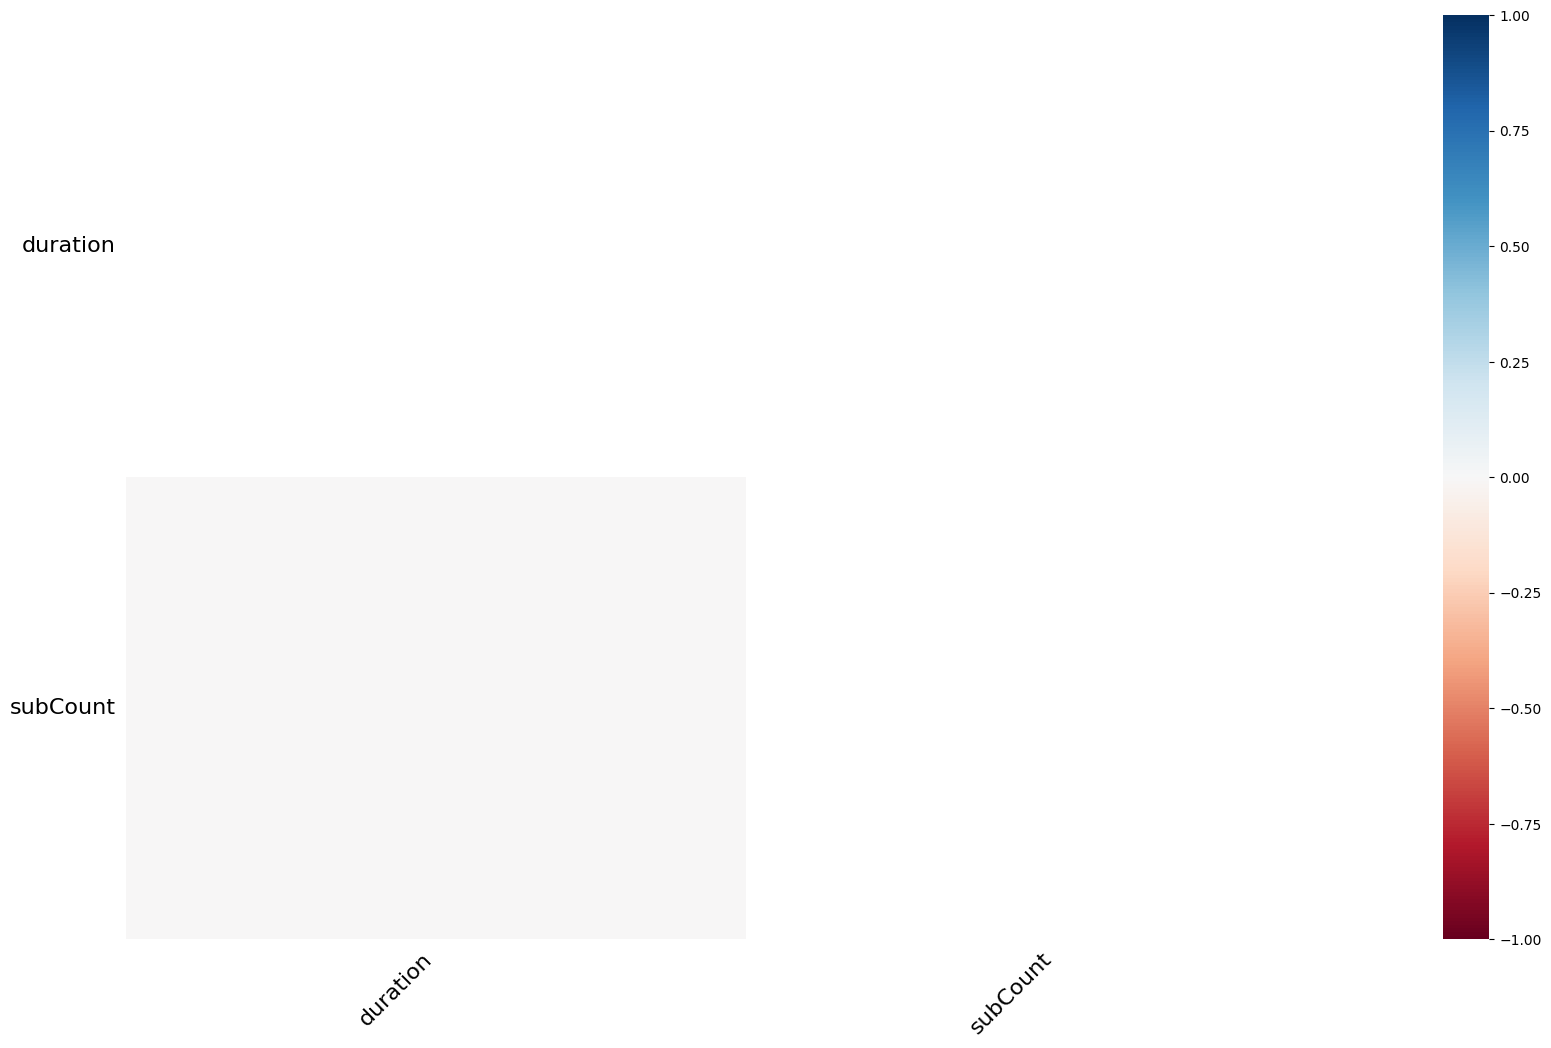

In [9]:
msno.heatmap(data)

The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.
Sehingga kita bisa mendrop data missing tersebut

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

_key            0
title           0
href            0
desc            0
likes           0
duration        0
channelName     0
subCount        0
dateAndViews    0
dtype: int64

Merapihkan data

1. kita akan mengubah beberapa data object menjadi integer
2. Memisahkan date & views, dan mengubahnya menjadi integer
3. mengecek jumlah capslock pada judul

In [12]:
data.drop(["_key"], axis=1, inplace=True)

<b> Penjelasan kode dibawah:  </b>
1. Kita pisahkan "dateAndViews" menjadi "Penonton" dan "tanggal" <br>
2. memformat tanggal

In [13]:
data["Penonton"] = data["dateAndViews"].str.extract(r"(\d{1,3}(?:,\d{3})*(?:\.\d+)?) views")
data["tanggal"] = data["dateAndViews"].str.extract(r"(\d{1,2} \w{3} \d{4})")

data["Penonton"] = data["Penonton"].str.replace(",", "").astype(float)
data["tanggal"] = pd.to_datetime(data["tanggal"], format="%d %b %Y")


<b> Penjelasan kode dibawah: </b>
1. Mengubah date menjadi "age", yang merupakan umur video itu diupload

In [14]:
from datetime import datetime

data["date"] = pd.to_datetime(data["tanggal"], format="%d %b %Y")
data["age"] = (datetime.now() - data["date"]).dt.days
data.drop("tanggal", axis=1, inplace=True)
data.drop("date", axis=1, inplace=True)
data.dropna(inplace=True)

<b> Penjelasan kode dibawah: </b>
1. Mengubah subcriber dengan data type object menjadi integer
2. mengganti K untuk satuan ribu dan M untuk satuan juta.
3. menghilangkan "subscriber"

In [15]:
# Menghilangkan "K", "M", mengubah menjadi integer, dan memastikan data bertipe string
data["subscriber"] = data["subCount"].apply(
    lambda x: (
        int(str(x).replace(".", "").replace("K", "").replace("subscribers", "")) * 1000
        if "K" in str(x)
        else int(str(x).replace(".", "").replace("M", "").replace("subscribers", "")) * 1000000
        if "M" in str(x)
        else int(str(x).replace("subscribers", "").strip())
    )
)

<b> Penjelasan kode dibawah: </b>
1. Mengubah "likes" dengan data type object menjadi integer
2. mengganti K untuk satuan ribu dan M untuk satuan juta.
3. menghilangkan "likes"
4. menghilankan baris, dengan kolom likes: "12345678901234567890123456789"

In [16]:
import numpy as np

# Menghapus "Like" dari kolom likes
data["likes"] = data["likes"].str.replace("Like", "")

# Mengonversi likes menjadi integer
data["Likes_Total"] = data["likes"].apply(
    lambda x: np.nan if "12345678901234567890123456789" in str(x) or not x else (
        int(float(str(x).replace("K", "").replace(".", "")) * 1000) if "K" in str(x) else (
            int(float(str(x).replace("M", "").replace(".", "")) * 1000000) if "M" in str(x) else (
                int(str(x).replace(",", ""))
            )
        )
    )
)


<b> Penjelasan kode dibawah: </b>
1. Mengganti "duration" menjadi durasi dalam bentuk detik

In [17]:
def convert_duration(duration):
    parts = list(map(int, duration.split(":")))
    if len(parts) == 3:
        hours, minutes, seconds = parts
    elif len(parts) == 2:
        hours = 0
        minutes, seconds = parts
    else:
        hours = 0
        minutes = 0
        seconds = parts[0]
    return hours * 3600 + minutes * 60 + seconds

data["durasi_total"] = data["duration"].apply(convert_duration)


<b> Penjelasan kode dibawah: </b>
1. menghitung jumlah capslock pada "title"
2. menghitung jumlah karakter non-standar pada "title"
3. mengkalkulasi clikcbait

In [18]:
import pandas as pd

def mengkalkulasi_clickbait(data):
    # Menghitung jumlah huruf kapital dalam judul
    data["numCaps"] = data["title"].str.findall(r"[A-Z]").str.len()
    
    # Menghitung jumlah karakter non-standar dalam judul
    data["numNonStand"] = data["title"].str.findall(r"[^\x00-\x7F]").str.len()
    
    # Menghitung skor clickbaity berdasarkan jumlah huruf kapital dan karakter non-standar
    data["clickbaity"] = data["numCaps"] + data["numNonStand"]
    
    # Menyaring nilai clickbaity yang lebih besar dari 0
    data["clickbaity"] = data["clickbaity"][data["clickbaity"] > 0]
    
    # Menghitung persentase clickbaity
    data["clickbaityPercent"] = data["clickbaity"] / data["title"].str.len() * 100
    
    return data




In [19]:
data = mengkalkulasi_clickbait(data)

In [20]:
#drop kolom yang sudah tidak diperlukan
data.drop(['subCount', 'dateAndViews', 'likes', 'duration', 'numCaps', 'numNonStand', 'clickbaity'], axis=1, inplace=True)

In [21]:
data.dropna(inplace=True)

mendrop data yang sudah tidak diperlukan serta menghilangkan data null, untuk memastikan data bersih

In [22]:
data.head()

,title,href,desc,channelName,Penonton,age,subscriber,Likes_Total,durasi_total,clickbaityPercent
0,In Rainbows but its just my voice,https://youtube.com/watch?v=Fno_k0VZtKs,my favorite is nude\r\n\r\n0:00 3x5 Stride\r\n...,giideon,82457.0,550.0,122000,66000.0,2472,6.060606
1,three lices and a molly - 'maybe we'll hug eac...,https://youtube.com/watch?v=ix-6vG3qXPc,Title: 'maybe we'll hug each other in a past l...,Rolly Abore,90772.0,42.0,187000,10000.0,3039,7.291667
2,haircuts for men - テ​ン​ペ​ス​ト​地​域 (COLLECTED ED...,https://youtube.com/watch?v=F-a0NFpHvZU,An album from haircuts from men. The album nam...,Aeon,138970.0,612.0,538,59000.0,5017,46.031746
3,The Greatest Legal Casino Heist in History,https://youtube.com/watch?v=uEkl2yAdoHw,Two gamblers find a manufacturing defect in pl...,Run The Numbers,1330914.0,51.0,188000,39000.0,4513,14.285714
7,RANGES - Cardinal Winds [Full Album MV],https://youtube.com/watch?v=gWyptX6duH8,Visual album for 'Cardinal Winds' released 8/2...,RANGES,7394.0,656.0,654,264.0,2395,30.769231


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 0 to 1408
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1139 non-null   object 
 1   href               1139 non-null   object 
 2   desc               1139 non-null   object 
 3   channelName        1139 non-null   object 
 4   Penonton           1139 non-null   float64
 5   age                1139 non-null   float64
 6   subscriber         1139 non-null   int64  
 7   Likes_Total        1139 non-null   float64
 8   durasi_total       1139 non-null   int64  
 9   clickbaityPercent  1139 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 97.9+ KB


<b>penjelasan dari ".info()"</b>
1. data sudah tidak ada missing value
2. dataa berisi 4 float, 2 int dan 4 object
3. kita akan melakukan analisis pada data type float dan int

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Penonton,1139.0,1.863564e+06,6.839959e+06,43.000000,88247.000000,295633.000,1.239946e+06,144798032.0
age,1139.0,4.624978e+02,6.519639e+02,25.000000,62.500000,216.000,5.885000e+02,4645.0
subscriber,1139.0,4.768953e+07,1.275729e+08,2.000000,160000.000000,355000.000,8.340000e+05,982000000.0
Likes_Total,1139.0,8.599683e+04,6.270679e+05,0.000000,15000.000000,34000.000,6.500000e+04,17000000.0
durasi_total,1139.0,1.643982e+03,1.753727e+03,46.000000,423.500000,1082.000,2.339000e+03,13468.0
clickbaityPercent,1139.0,1.985389e+01,1.589824e+01,1.010101,11.764706,15.625,2.088178e+01,100.0


<b>Penjelasan ".describe()"</b>
1. likes total pada video video berada pada rentang 0 s/d 17jt
2. durasi film terlama berada pada 13468 detik
3. ada video yang merupakan 100% clickbait
4. subscriber berada pada rentang 2 s/d 982 jt
5. ada anomali yaitu subscriber 982 jt karena sekarang paling baanyak 300=an jt

In [25]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['title', 'href', 'desc', 'channelName'], dtype='object')
Numerical Variables:
['Penonton', 'age', 'subscriber', 'Likes_Total', 'durasi_total', 'clickbaityPercent']


<b>Skew Analysis

Penonton
Skew : 12.57


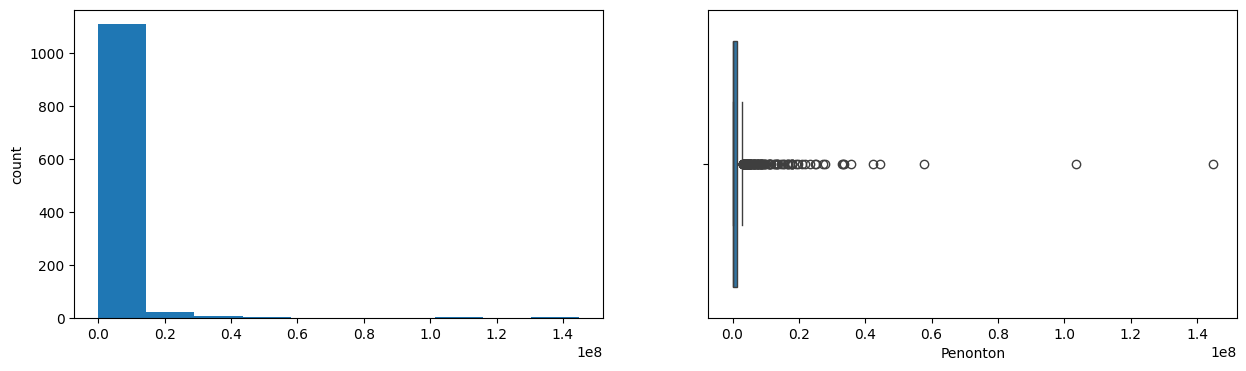

age
Skew : 2.93


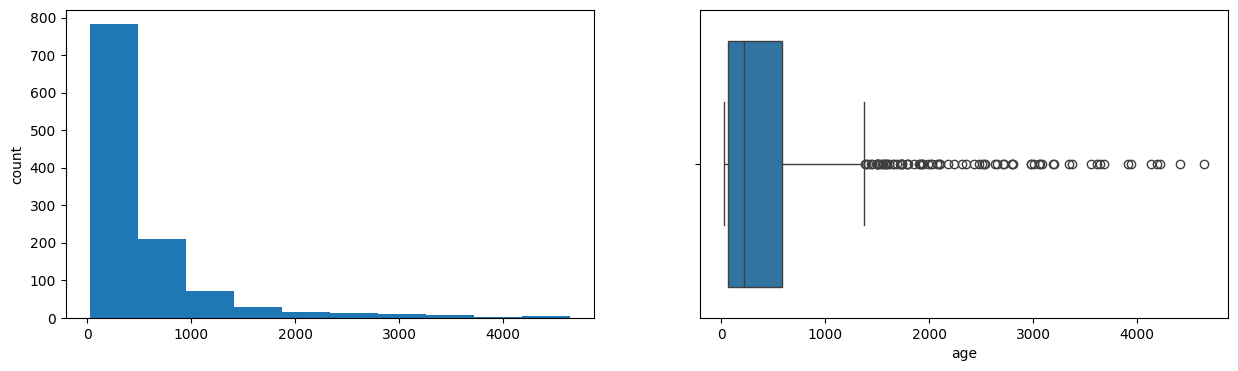

subscriber
Skew : 3.76


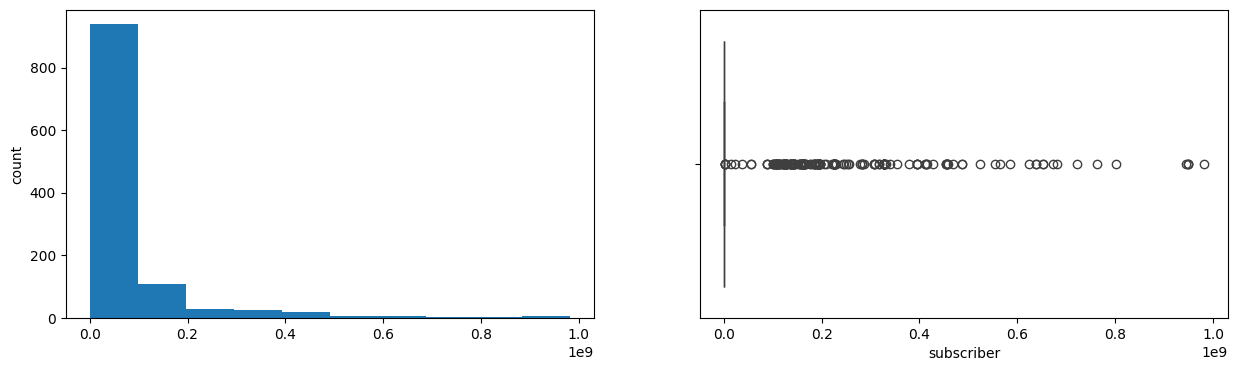

Likes_Total
Skew : 23.41


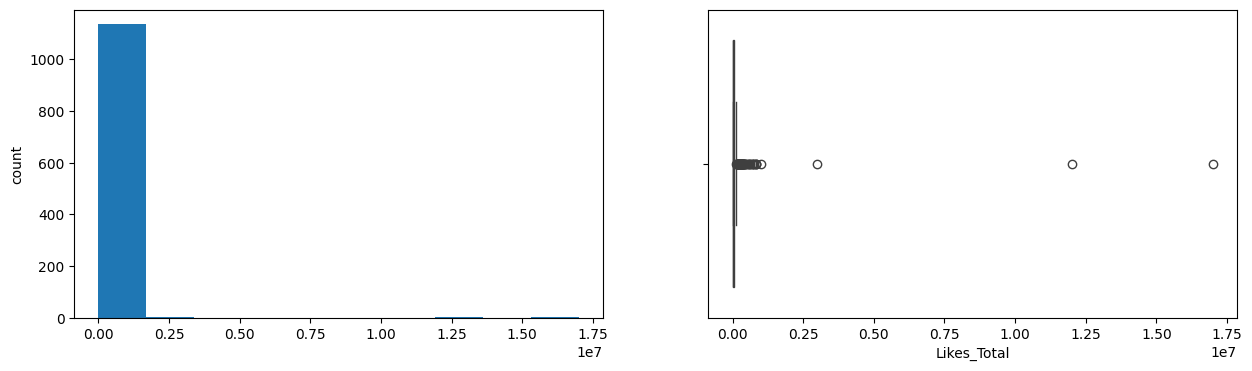

durasi_total
Skew : 2.36


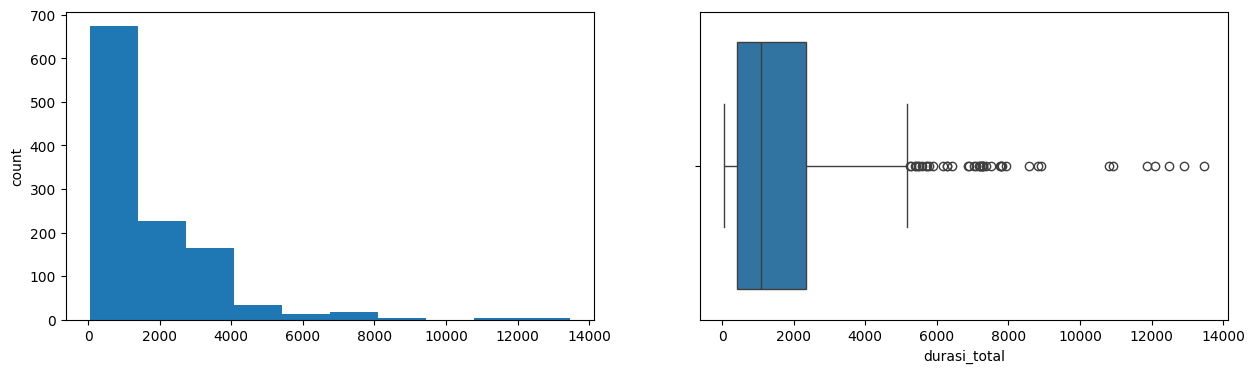

clickbaityPercent
Skew : 2.54


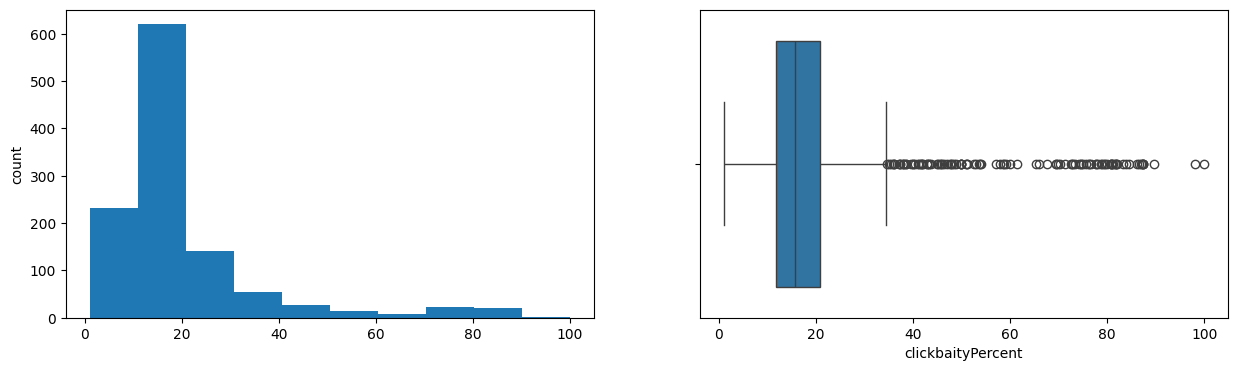

In [26]:
# mengecek dan mengvisualisasi histogram dan boxplot pada colom numerical variabel
import matplotlib.pyplot as plt
import seaborn as sns
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

<b>Hasil:</b> <br>
1. datanya memiliki banyak outlier <br>
2. Banyak Video yang memiliki jumlah like sedikit
3. Likes_Total memiliki, Skew : 23.41

Transformasi data

In [27]:
data['Penonton_log'] = np.log1p(data['Penonton'])
data['log_subscriber'] = np.log1p(data['subscriber'])
data['log_likes_total'] = np.log1p(data['Likes_Total'])
data['log_durasi_total'] = np.log1p(data['durasi_total'])
data['log_clickbaitPercent'] = np.log1p(data['clickbaityPercent'])

Penjelasan:
<hr>
1. data[‘Penonton_log’] = np.log(data[‘Penonton’] + 1):  <br>
a. Tujuan: Mengurangi skewness pada distribusi data ‘Penonton’.  <br>
b. Alasan: Menambahkan 1 sebelum mengambil logaritma untuk menghindari masalah log(0), yang tidak terdefinisi.  <br><br>
2. data[‘log_subscriber’] = np.log1p(data[‘subscriber’]): <br>
a. Tujuan: Mengurangi skewness pada distribusi data ‘subscriber’. <br>
b. Alasan: np.log1p(x) adalah fungsi yang menghitung log(1 + x) dengan lebih akurat untuk nilai x yang sangat kecil, menghindari masalah presisi yang mungkin terjadi dengan np.log(1 + x). <br> <br>
3. data[‘log_likes_total’] = np.log1p(data[‘likes_total’]):<br>
    a. Tujuan: Mengurangi skewness pada distribusi data ‘likes_total’.<br>
    b. Alasan: Sama seperti sebelumnya, np.log1p digunakan untuk presisi yang lebih baik.<br><br>
4. data[‘log_durasi_total’] = np.log1p(data[‘durasi_total’]):<br>
    a. Tujuan: Mengurangi skewness pada distribusi data ‘durasi_total’.<br>
    b. Alasan: Menggunakan np.log1p untuk menangani nilai kecil dengan lebih baik.<br><br>
5. data[‘log_clickbaitPercent’] = np.log1p(data[‘clickbaitPercent’]):<br>
    a. Tujuan: Mengurangi skewness pada distribusi data ‘clickbaitPercent’.<br>
    b. Alasan: Sama seperti sebelumnya, np.log1p digunakan untuk presisi yang lebih baik.<br><br>
Secara umum, transformasi logaritmik membantu dalam:
<br>
Mengurangi Skewness: Membuat distribusi data lebih mendekati distribusi normal.<br>
1. Mengurangi Dampak Outlier: Outlier yang sangat besar akan memiliki dampak yang lebih kecil setelah<br>
2. transformasi logaritmik.<br>
3, Meningkatkan Kinerja Model: Banyak algoritma machine learning bekerja lebih baik dengan data yang terdistribusi normal.

In [28]:
data.drop(['Penonton', 'subscriber', 'Likes_Total', 'durasi_total', 'clickbaityPercent'], axis=1, inplace=True)

Mendrop data yang sudah di transformasi

Korelasi-korelasi
untuk melihat korelasi kami menggunakan Pairplot dari seaborn, karena:
1. pairplot memberikan kami untuk melihat hubungan antara setiap pasangan variabel dalam dataset. sehingga akan sangat berguna untuk mengidentifikasi korelasi dan pola yang mungkin tidak terlihat hanya dengan melihat angka seperti "heatmap dari seaborn".
2. Diagonal dari pairplot menunjukkan histogram atau KDE (Kernel Density Estimate) dari masing-masing variabel, sehingga kami bisa melihat distribusi data.
3. Selain itu, juga pairplot membantu mengidentifikasi outlier atau data yang menyimpang dari pola umum, yang bisa mempengaruhi hasil analisis.

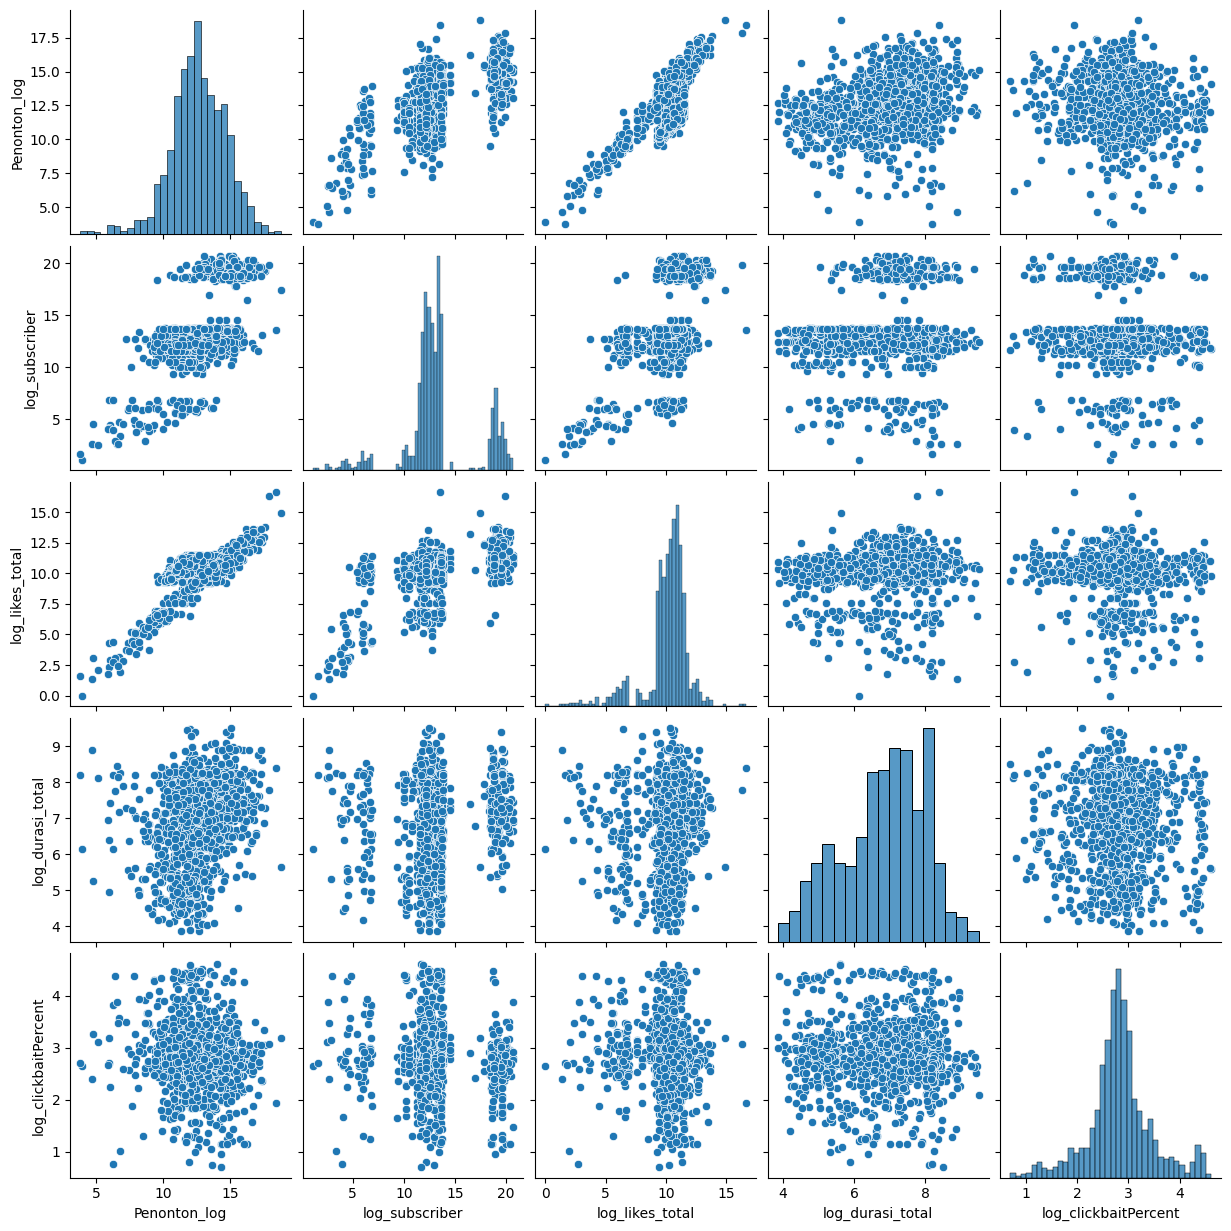

In [29]:
sns.pairplot(data[["Penonton_log", "log_subscriber", "log_likes_total", "log_durasi_total", "log_clickbaitPercent"]])
plt.show()

<b> Matrix Correlation

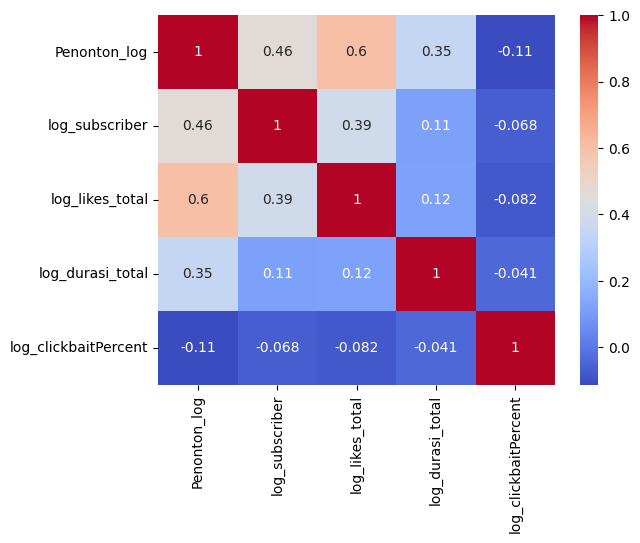

In [30]:
corr_matrix = data[["Penonton_log", "log_subscriber", "log_likes_total", "log_durasi_total", "log_clickbaitPercent"]].corr("spearman")
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

<b> Hasil: </b>
1. penonton dan subscriber memiliki correlasi positif (0,46)
2. subscriber dan likes memiliki correlasi positif (0,39)

In [31]:
corr_value = data["Penonton_log"].corr(data["log_subscriber"], method="spearman")
print(f"Korelasi antara Penonton_log dan log_subscriber: {corr_value}")
corr_value = data["Penonton_log"].corr(data["log_likes_total"], method="spearman")
print(f"Korelasi antara Penonton_log dan log_likes_total: {corr_value}")
corr_value = data["Penonton_log"].corr(data["log_clickbaitPercent"], method="spearman")
print(f"Korelasi antara log_clickbaitPercent dan log_likes_total: {corr_value}")
corr_value = data["log_subscriber"].corr(data["log_likes_total"], method="spearman")
print(f"Korelasi antara log_subscriber dan log_likes_total: {corr_value}")

Korelasi antara Penonton_log dan log_subscriber: 0.46330887283138783
Korelasi antara Penonton_log dan log_likes_total: 0.6001268542636128
Korelasi antara log_clickbaitPercent dan log_likes_total: -0.1128947112666482
Korelasi antara log_subscriber dan log_likes_total: 0.38807475065695635


In [32]:
import plotly.subplots as sp
import plotly.graph_objects as go
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_columns:
    print(col)
    print("Skew:", round(data[col].skew(), 2))
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Histogram", "Box Plot"))
    trace1 = go.Histogram(x=data[col], name="Histogram", nbinsx=40)
    fig.add_trace(trace1, row=1, col=1)
    trace2 = go.Box(y=data[col], name="Box Plot", boxpoints="outliers")
    fig.add_trace(trace2, row=1, col=2)
    fig.update_layout(showlegend=False, title_text=f"Distribution of {col}")
    fig.show()

age
Skew: 2.93


Penonton_log
Skew: -0.42


log_subscriber
Skew: 0.02


log_likes_total
Skew: -1.75


log_durasi_total
Skew: -0.38


log_clickbaitPercent
Skew: 0.03


In [33]:
# mencari
import plotly.express as px 
px.scatter(data, x = 'Penonton_log', y = 'log_likes_total', color='log_likes_total', trendline = "ols", color_continuous_scale="plotly3")

In [34]:
px.scatter_3d(data, x = 'Penonton_log', y = 'log_subscriber', z= 'log_likes_total', color_continuous_scale='bluered')

Hasilnya ada kemiringan

In [35]:
fig = px.scatter(data, x='log_clickbaitPercent', y='Penonton_log', title='Penonton_log vs log_clickbaitPercent')
fig.show()

Penjelasan <br>
<hr>
1. Distribusi Data: Data poin tersebar di seluruh grafik tanpa pola linier yang jelas. Ini menunjukkan bahwa tidak ada korelasi sederhana antara Penonton_log dan log_clickbaitPercent. <br>

<b>Rentang Nilai:</b>
1. log_clickbaitPercent: Nilai berkisar antara sekitar 0.5 hingga 4.5.<br>
2. Penonton_log: Nilai berkisar antara sekitar 5 hingga 20.<br>
3. Kepadatan Data: Beberapa area mungkin memiliki kepadatan data yang lebih tinggi, yang bisa menunjukkan bahwa sebagian besar data poin berada dalam rentang tertentu. Misalnya, jika ada banyak titik di sekitar nilai tertentu, itu bisa menunjukkan bahwa banyak video dengan persentase clickbait tertentu memiliki jumlah penonton yang serupa.


In [36]:
fig = px.scatter(
    data,
    x="log_likes_total",
    y="Penonton_log",
    trendline="ols",
    color="Penonton_log",
    color_continuous_scale="plotly3",
)
display(fig)
results = px.get_trendline_results(fig)

print(results.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1766.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.23e-233
Time:                        13:51:02   Log-Likelihood:                -1905.5
No. Observations:                1139   AIC:                             3815.
Df Residuals:                    1137   BIC:                             3825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8850      0.211     18.401      0.0